# **Introducción**

En este cuaderno de Colab se explorará la biblioteca TensorFlow [1], utlizando el modulo Keras para crear y entrenar una Red Neuronal.

Esta red neuronal usa varias capas de *circunvolución* [2]. Estas capas ayudan a detectar formas o figuras de una imagen, para no solo detectar píxel por píxel.

El modelo desarrollado será utilizado para reconocer imagenes de escenas de capítulos de las series "Los Simpson" [3] o "Rick & Morty" [4]. Luego de entrenar el modelo, se hará la prueba de ingresar una imagen, para ver si el valor que predice este modelo es correcto.

# **Armado del ambiente**
### **Descarga de imagenes**
Los conjuntos de datos utilizados se encuentran en el repositorio de GitHub https://github.com/facu97martin/eda2_soa/tree/main/HPC/Images

Estas imágenes fueron obtenidas de una recopilación de episodios de las series mencionadas. Para entrenar el modelo, se utilizaron aproximadamente 600 imágenes para cada serie.

In [ ]:
!wget --no-check-certificate \
https://github.com/facu97martin/eda2_soa/raw/main/HPC/Images/dataset.zip \
-O /tmp/rps.zip

!wget --no-check-certificate \
https://github.com/facu97martin/eda2_soa/raw/main/HPC/Images/test.zip \
-O /tmp/rps-test.zip

In [35]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/rps')
zip_ref.close()

local_zip = '/tmp/rps-test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/rps-test')
zip_ref.close()

rickandmorty_dir = os.path.join('/tmp/rps/rickandmorty')
simpsons_dir = os.path.join('/tmp/rps/simpsons')

rickandmorty_files = os.listdir(rickandmorty_dir)
simpsons_files = os.listdir(simpsons_dir)

# **Desarrollo**

## **Entrenar modelo**

En esta sección, se crea el modelo a utilizar para el reconocimiento de imágenes. Está basado en un modelo de ejemplo [5] desarrollado por TensorFlow

Entrenar este modelo tarda aproximadamente entre 40 y 60 minutos

In [41]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=128
)

model = tf.keras.models.Sequential([
    # La imagen se adaptara a 150x150 pixeles, y se utilizaran 3 bytes para colores (RGB)
    # Capa 1 de circunvolución
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Capa 2 de circunvolución
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Capa 3 de circunvolución
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Capa 4 de circunvolución
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten y Dropout optimizan la entrada para la siguiente capa de neuronas
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Capa interna de 512 neuronas
    tf.keras.layers.Dense(512, activation='relu'),
    # Capa final de 2 neuronas, una para cada resultado (los simpsons o rick & morty)
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs = 20, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Found 1541 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 17, 17, 128)       0         
_____________________________________

## **Predicciones del conjunto de pruebas**

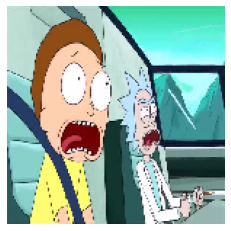

Predicción: Rick & Morty


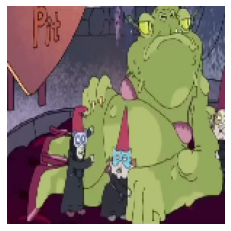

Predicción: Rick & Morty


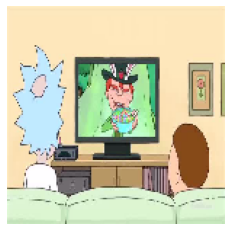

Predicción: Rick & Morty


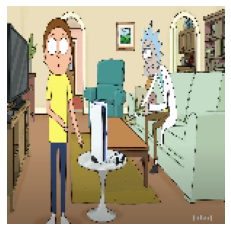

Predicción: Rick & Morty


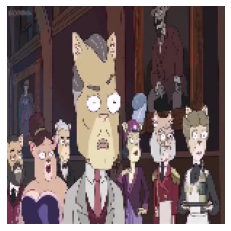

Predicción: Rick & Morty


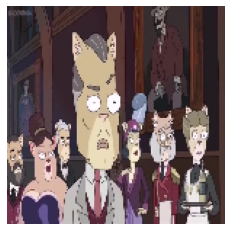

Predicción: Rick & Morty


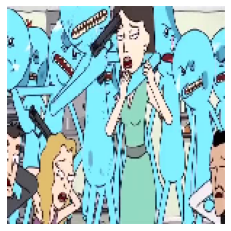

Predicción: Rick & Morty


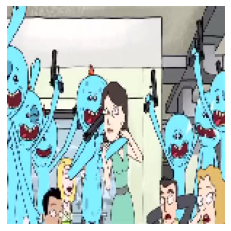

Predicción: Rick & Morty


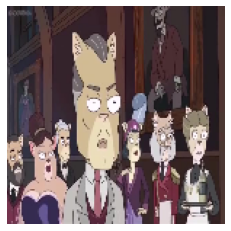

Predicción: Rick & Morty


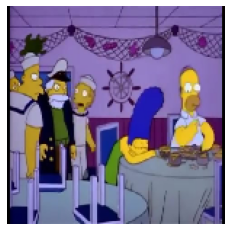

Predicción: Los Simpsons


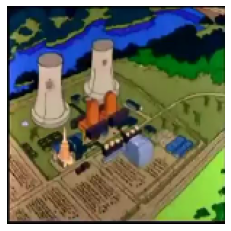

Predicción: Los Simpsons


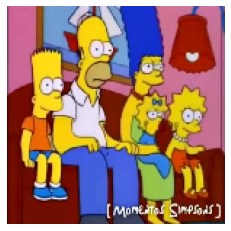

Predicción: Los Simpsons


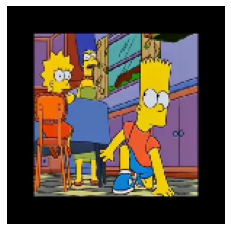

Predicción: Los Simpsons


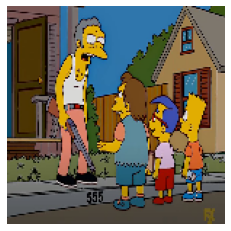

Predicción: Los Simpsons


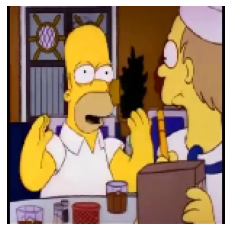

Predicción: Los Simpsons


In [45]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_image(path, fn):
  path = path + "/" + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  plt.imshow(img)
  plt.axis('Off')
  plt.show()

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if(classes[0,0] == 1):
    print("Predicción: Rick & Morty")
  else:
    print("Predicción: Los Simpsons")

rickandmorty_dir = os.path.join('/tmp/rps-test/rickandmorty')
simpsons_dir = os.path.join('/tmp/rps-test/simpsons')

for fn in os.listdir(rickandmorty_dir):
  predict_image(rickandmorty_dir, fn)

for fn in os.listdir(simpsons_dir):
  predict_image(simpsons_dir, fn)

### **Predicciones almacenadas**

Dado que entrenar el modelo lleva entre 40 y 60 minutos, se adjuntan imagenes de las predicciones realizadas por este modelo una vez entrenado:

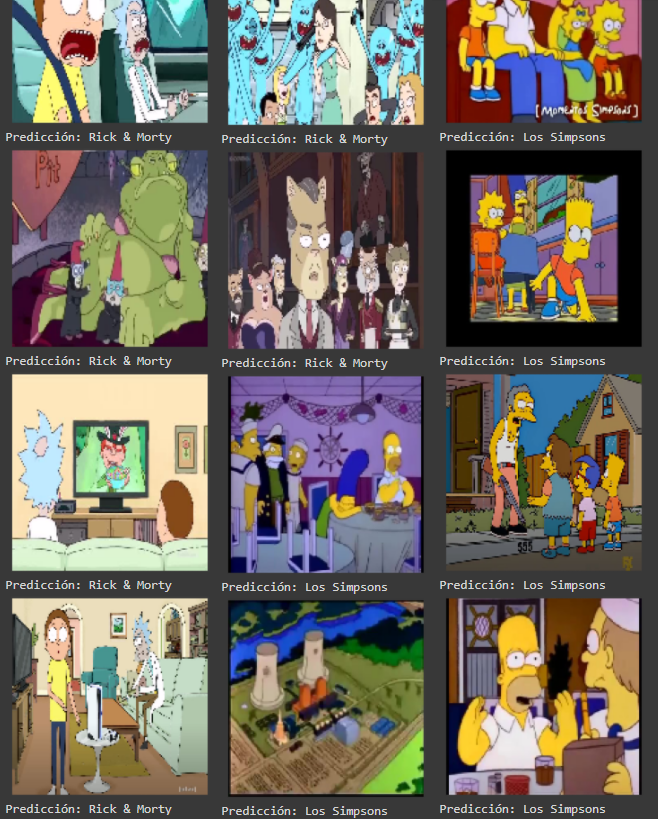



## **Ingrese su imagen para predecir!**

--2020-11-22 17:26:36--  https://www.eluniverso.com/sites/default/files/styles/powgallery_1024/public/fotos/2019/12/los-simpson-175237_13989284_12966419.jpg?itok=m5Hu5dRJ
Resolving www.eluniverso.com (www.eluniverso.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to www.eluniverso.com (www.eluniverso.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79686 (78K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>]  77.82K  --.-KB/s    in 0.01s   

2020-11-22 17:26:36 (5.61 MB/s) - ‘imagen.jpg’ saved [79686/79686]



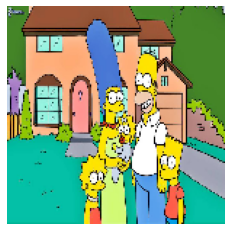

Predicción: Los Simpsons


In [55]:
url_imagen = "https://www.eluniverso.com/sites/default/files/styles/powgallery_1024/public/fotos/2019/12/los-simpson-175237_13989284_12966419.jpg?itok=m5Hu5dRJ" #@param {type:"string"}

!wget {url_imagen} -O imagen.jpg

path = 'imagen.jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

plt.imshow(img)
plt.axis('Off')
plt.show()

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

if(classes[0,0] == 1):
  print("Predicción: Rick & Morty")
else:
  print("Predicción: Los Simpsons")

# **Bibliografía**

[1] https://www.tensorflow.org/

[2] Cada uno de los relieves que se observan en la superficie exterior del cerebro, separados unos de otros por unos surcos llamados anfractuosidades.

[3] https://es.wikipedia.org/wiki/Los_Simpson

[4] https://es.wikipedia.org/wiki/Rick_y_Morty

[5] http://bit.ly/2lXXdw5